# PMIA Indian Diabetes

### Import and Read the file

In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('C:/Personal/71053934/Documents/SHAHRZAD/Python/Kaggle/Pima Indian Diabetes')

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().values.any()

False

In [6]:
X_col = df.columns[:-1]
X = df[X_col]
y_col = df.columns[-1]
y = df[y_col]

### Split train and test data

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

for i, a in zip(range(7),[0.01, 0.1, 1, 10, 100, 1000, 10000]):
    clf = LogisticRegression(C = a).fit(X_train, y_train)
    predicted = clf.predict(X_test)
    print('------------')
    print('C:', a)
    print('accuracy score:{:.2f}'.format(accuracy_score(predicted, y_test)))
    print('precision score.{:.2f}'.format(precision_score(predicted, y_test)))
    print('recall score.{:.2f}'.format(recall_score(predicted, y_test)))
    print('f1_score.{:.2f}'.format(f1_score(predicted, y_test)))

------------
C: 0.01
accuracy score:0.73
precision score.0.44
recall score.0.63
f1_score.0.51
------------
C: 0.1
accuracy score:0.78
precision score.0.52
recall score.0.71
f1_score.0.60
------------
C: 1
accuracy score:0.81
precision score.0.58
recall score.0.77
f1_score.0.66
------------
C: 10
accuracy score:0.81
precision score.0.60
recall score.0.76
f1_score.0.67
------------
C: 100
accuracy score:0.80
precision score.0.58
recall score.0.75
f1_score.0.65
------------
C: 1000
accuracy score:0.80
precision score.0.58
recall score.0.75
f1_score.0.65
------------
C: 10000
accuracy score:0.80
precision score.0.58
recall score.0.75
f1_score.0.65


### Area under the curve

C:\Users\71053934\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


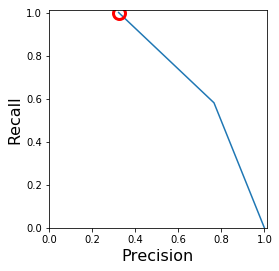

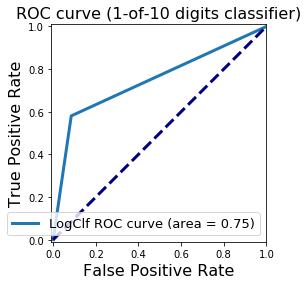

In [29]:
clf = LogisticRegression(C= 1).fit(X_train, y_train)
predicted = clf.predict(X_test)

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, predicted)

closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

#plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

fpr_clf, tpr_clf, _ = roc_curve(y_test, predicted)
roc_auc_lr = auc(fpr_clf, tpr_clf)

#plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_clf, tpr_clf, lw=3, label='LogClf ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()


### Support Vector Machine

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

this_c = 1
clf = SVC(kernel = 'linear', C = this_c).fit(X_train, y_train)
predicted = clf.predict(X_test)

print('------------')
print('C:', this_c)
print('accuracy score:{:.2f}'.format(accuracy_score(predicted, y_test)))
print('precision score.{:.2f}'.format(precision_score(predicted, y_test)))
print('recall score.{:.2f}'.format(recall_score(predicted, y_test)))
print('f1_score.{:.2f}'.format(f1_score(predicted, y_test)))


------------
C: 1
accuracy score:0.80
precision score.0.60
recall score.0.74
f1_score.0.66
